# Simple Random Sampling in Data Mining

## Learning Objectives
By the end of this notebook, you will understand:
- The concept and importance of simple random sampling
- How to implement random sampling with and without replacement
- The difference between sampling with and without replacement
- How to visualize sampling results to validate representativeness
- When to use simple random sampling in data mining projects

## Introduction
Simple random sampling is a fundamental statistical technique used in data mining to select a subset of data from a larger population. Each data point has an equal probability of being selected, making it an unbiased sampling method. This technique is crucial for:
- Reducing computational complexity with large datasets
- Creating training/testing splits for machine learning
- Statistical analysis and hypothesis testing
- Data exploration and visualization

In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.3.1


## Step 1: Create Sample Dataset

We'll create a synthetic customer dataset with 100 records to demonstrate simple random sampling techniques.

In [2]:
# Sample dataset: Customer data
np.random.seed(42)  # For reproducible results
data = {
    "Customer_ID": np.arange(1, 101),  # 100 customers
    "Age": np.random.randint(18, 70, 100),  # Random ages between 18 and 70
    "Income": np.random.randint(20000, 120000, 100),  # Random income between 20k and 120k
    "Spending_Score": np.random.randint(1, 100, 100)  # Random spending scores between 1 and 100
}

df = pd.DataFrame(data)
print("Original Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 10 rows of the original dataset:")
print(df.head(10))

Original Dataset Shape: (100, 4)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer_ID     100 non-null    int64
 1   Age             100 non-null    int64
 2   Income          100 non-null    int64
 3   Spending_Score  100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB
None

First 10 rows of the original dataset:
   Customer_ID  Age  Income  Spending_Score
0            1   56   81228              59
1            2   69   68984              32
2            3   46   60774              96
3            4   32   22568              88
4            5   60   82592              52
5            6   25   87563              62
6            7   38   22695              58
7            8   56   68190              52
8            9   36   25258              12
9           10   40  107538              39


## Step 2: Basic Dataset Statistics

Let's examine the statistical properties of our original dataset before sampling.

In [3]:
# Display basic statistics
print("Original Dataset Statistics:")
print(df.describe())

print(f"\nDataset size: {len(df)} customers")
print(f"Age range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"Income range: ${df['Income'].min():,} - ${df['Income'].max():,}")
print(f"Spending Score range: {df['Spending_Score'].min()} - {df['Spending_Score'].max()}")

Original Dataset Statistics:
       Customer_ID         Age         Income  Spending_Score
count   100.000000  100.000000     100.000000      100.000000
mean     50.500000   43.350000   69474.690000       48.760000
std      29.011492   14.904663   29863.619229       31.064976
min       1.000000   19.000000   20206.000000        1.000000
25%      25.750000   31.750000   43229.750000       20.000000
50%      50.500000   42.000000   70325.500000       52.000000
75%      75.250000   57.000000   95529.000000       73.500000
max     100.000000   69.000000  118806.000000       99.000000

Dataset size: 100 customers
Age range: 19 - 69 years
Income range: $20,206 - $118,806
Spending Score range: 1 - 99


## Step 3: Simple Random Sampling Without Replacement

Simple random sampling without replacement ensures that each data point can only be selected once. This is the most common form of sampling.

In [4]:
# Simple Random Sampling: Randomly select 10% of the data (10 customers)
sample_size = int(0.1 * len(df))
print(f"Sample size: {sample_size} customers ({sample_size/len(df)*100:.1f}% of original data)")

# Perform sampling without replacement
df_sample = df.sample(n=sample_size, random_state=42)

print(f"\nRandomly Selected Sample (10% of data):")
print(df_sample)

# Compare statistics between original and sample
print(f"\nComparison of Statistics:")
print("Metric\t\tOriginal\tSample\t\tDifference")
print("-" * 50)
print(f"Mean Age\t{df['Age'].mean():.1f}\t\t{df_sample['Age'].mean():.1f}\t\t{abs(df['Age'].mean() - df_sample['Age'].mean()):.1f}")
print(f"Mean Income\t{df['Income'].mean():.0f}\t\t{df_sample['Income'].mean():.0f}\t\t{abs(df['Income'].mean() - df_sample['Income'].mean()):.0f}")
print(f"Mean Score\t{df['Spending_Score'].mean():.1f}\t\t{df_sample['Spending_Score'].mean():.1f}\t\t{abs(df['Spending_Score'].mean() - df_sample['Spending_Score'].mean()):.1f}")

Sample size: 10 customers (10.0% of original data)

Randomly Selected Sample (10% of data):
    Customer_ID  Age  Income  Spending_Score
83           84   32   50080              48
53           54   43  100356              36
70           71   23  115259              89
45           46   26  107054              73
44           45   38   20206              97
39           40   69   72992              98
22           23   55   50535               1
80           81   31   41976              60
10           11   28   59504               2
0             1   56   81228              59

Comparison of Statistics:
Metric		Original	Sample		Difference
--------------------------------------------------
Mean Age	43.4		40.1		3.2
Mean Income	69475		69919		444
Mean Score	48.8		56.3		7.5


## Step 4: Simple Random Sampling With Replacement

Sampling with replacement allows the same data point to be selected multiple times. This is useful in bootstrap sampling and some statistical methods.

In [5]:
# Sample with replacement (where the same data point could be selected multiple times)
df_sample_with_replacement = df.sample(n=sample_size, replace=True, random_state=42)

print("Randomly Selected Sample with Replacement:")
print(df_sample_with_replacement)

# Check for duplicates in the sample with replacement
duplicates = df_sample_with_replacement.duplicated(subset=['Customer_ID']).sum()
print(f"\nNumber of duplicate customers in replacement sample: {duplicates}")

if duplicates > 0:
    print("Duplicate Customer IDs:")
    duplicate_ids = df_sample_with_replacement[
        df_sample_with_replacement.duplicated(subset=['Customer_ID'], keep=False)
    ]['Customer_ID'].sort_values()
    print(duplicate_ids.tolist())

Randomly Selected Sample with Replacement:
    Customer_ID  Age  Income  Spending_Score
51           52   67  107939              20
92           93   64   25530              80
14           15   57   32666              59
71           72   59   89163              50
60           61   25  101734              71
20           21   61   42662              96
82           83   65   43776               1
86           87   40   26776              37
74           75   35   62941              94
74           75   35   62941              94

Number of duplicate customers in replacement sample: 1
Duplicate Customer IDs:
[75, 75]


## Step 5: Visualizing Sampling Results

Let's create visualizations to compare the original dataset with our samples and assess how well they represent the population.

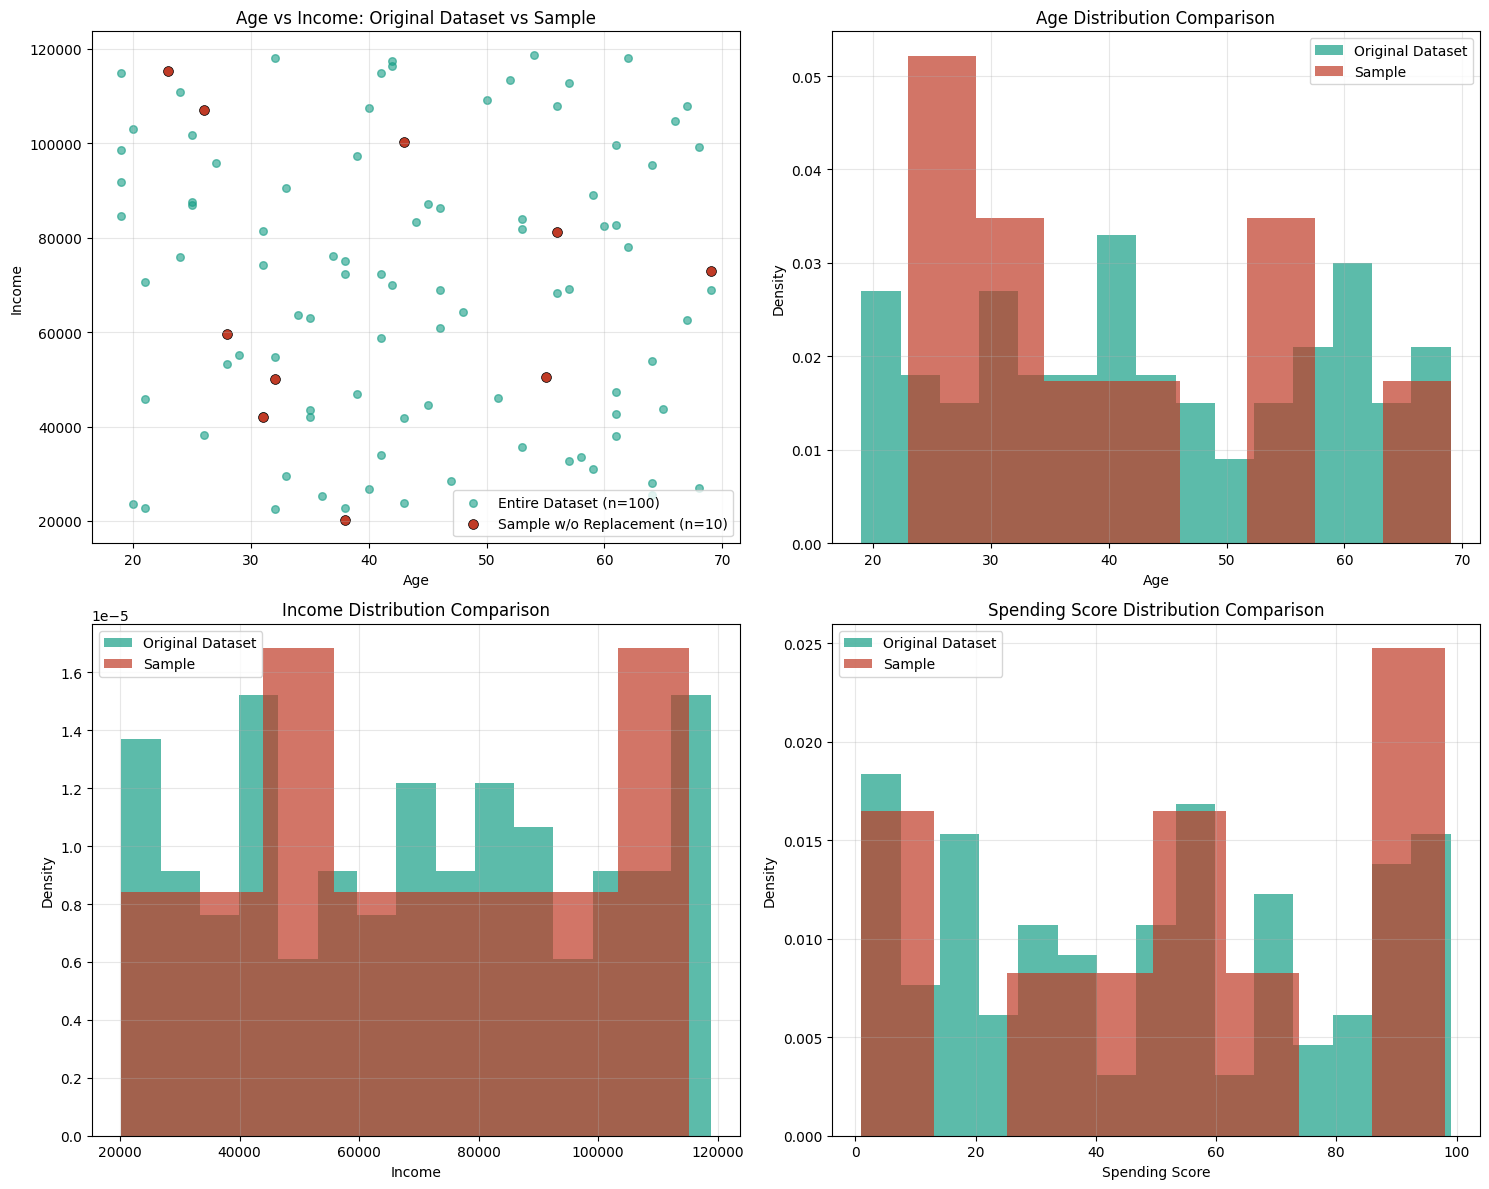

In [6]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Age vs Income scatter plot
axes[0, 0].scatter(df["Age"], df["Income"], label="Entire Dataset (n=100)", 
                   color="#179E86", alpha=0.6, s=30)
axes[0, 0].scatter(df_sample["Age"], df_sample["Income"], 
                   label=f"Sample w/o Replacement (n={sample_size})", 
                   color="#C03B26", s=50, edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Income")
axes[0, 0].set_title("Age vs Income: Original Dataset vs Sample")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Age distribution comparison
axes[0, 1].hist(df["Age"], bins=15, alpha=0.7, label="Original Dataset", 
                color="#179E86", density=True)
axes[0, 1].hist(df_sample["Age"], bins=8, alpha=0.7, label="Sample", 
                color="#C03B26", density=True)
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Density")
axes[0, 1].set_title("Age Distribution Comparison")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Income distribution comparison
axes[1, 0].hist(df["Income"], bins=15, alpha=0.7, label="Original Dataset", 
                color="#179E86", density=True)
axes[1, 0].hist(df_sample["Income"], bins=8, alpha=0.7, label="Sample", 
                color="#C03B26", density=True)
axes[1, 0].set_xlabel("Income")
axes[1, 0].set_ylabel("Density")
axes[1, 0].set_title("Income Distribution Comparison")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Spending Score distribution comparison
axes[1, 1].hist(df["Spending_Score"], bins=15, alpha=0.7, label="Original Dataset", 
                color="#179E86", density=True)
axes[1, 1].hist(df_sample["Spending_Score"], bins=8, alpha=0.7, label="Sample", 
                color="#C03B26", density=True)
axes[1, 1].set_xlabel("Spending Score")
axes[1, 1].set_ylabel("Density")
axes[1, 1].set_title("Spending Score Distribution Comparison")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Sample Size Analysis

Let's examine how different sample sizes affect the representativeness of our samples.

Impact of Sample Size on Representativeness:
(Differences in means compared to original dataset)
   Sample_Size Percentage  Age_Diff  Income_Diff  Score_Diff
0            5       5.0%     10.95      9116.31       19.84
1           10      10.0%      3.25       444.31        7.54
2           20      20.0%      1.45      1278.34        4.04
3           30      30.0%      0.98      2035.48        0.26
4           50      50.0%      0.95      6486.03        1.42


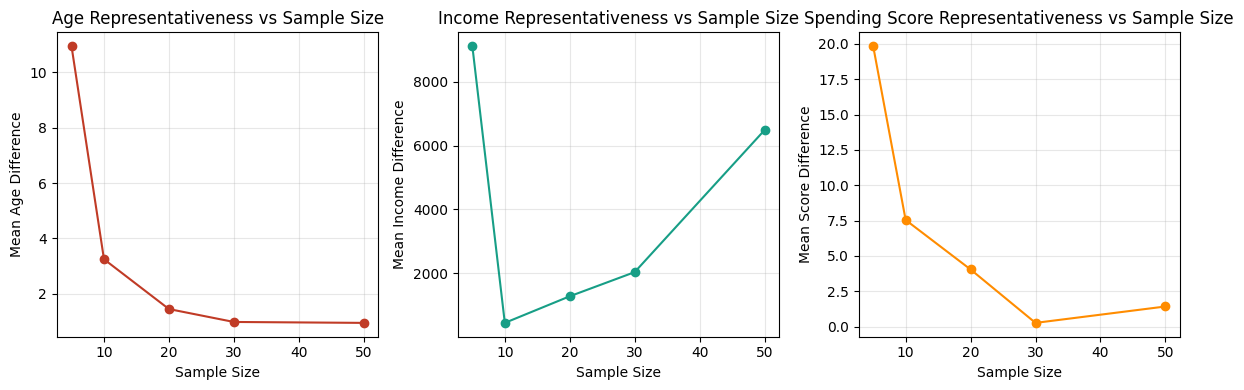

In [7]:
# Test different sample sizes
sample_sizes = [5, 10, 20, 30, 50]
results = []

for size in sample_sizes:
    sample = df.sample(n=size, random_state=42)
    
    # Calculate differences in means
    age_diff = abs(df['Age'].mean() - sample['Age'].mean())
    income_diff = abs(df['Income'].mean() - sample['Income'].mean())
    score_diff = abs(df['Spending_Score'].mean() - sample['Spending_Score'].mean())
    
    results.append({
        'Sample_Size': size,
        'Percentage': f"{size/len(df)*100:.1f}%",
        'Age_Diff': age_diff,
        'Income_Diff': income_diff,
        'Score_Diff': score_diff
    })

results_df = pd.DataFrame(results)
print("Impact of Sample Size on Representativeness:")
print("(Differences in means compared to original dataset)")
print(results_df.round(2))

# Visualize the impact of sample size
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(results_df['Sample_Size'], results_df['Age_Diff'], 'o-', color='#C03B26')
plt.xlabel('Sample Size')
plt.ylabel('Mean Age Difference')
plt.title('Age Representativeness vs Sample Size')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(results_df['Sample_Size'], results_df['Income_Diff'], 'o-', color='#179E86')
plt.xlabel('Sample Size')
plt.ylabel('Mean Income Difference')
plt.title('Income Representativeness vs Sample Size')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(results_df['Sample_Size'], results_df['Score_Diff'], 'o-', color='#FF8C00')
plt.xlabel('Sample Size')
plt.ylabel('Mean Score Difference')
plt.title('Spending Score Representativeness vs Sample Size')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 7: Practical Applications and Best Practices

Let's demonstrate some practical scenarios where simple random sampling is commonly used.

In [8]:
# Example 1: Creating train-test splits for machine learning
def create_train_test_split(data, train_ratio=0.8, random_state=42):
    """Create train-test split using random sampling"""
    train_size = int(train_ratio * len(data))
    
    # Sample for training set
    train_data = data.sample(n=train_size, random_state=random_state)
    # Remaining data for testing
    test_data = data.drop(train_data.index)
    
    return train_data, test_data

# Create 80-20 train-test split
train_df, test_df = create_train_test_split(df, train_ratio=0.8)

print(f"Original dataset size: {len(df)}")
print(f"Training set size: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
print(f"Test set size: {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")

# Example 2: Sampling for data exploration
def quick_sample_analysis(data, sample_ratio=0.1, random_state=42):
    """Perform quick analysis on a random sample"""
    sample_size = max(1, int(sample_ratio * len(data)))
    sample = data.sample(n=sample_size, random_state=random_state)
    
    print(f"\nQuick Analysis on {sample_size} samples ({sample_ratio*100:.1f}% of data):")
    print("Sample statistics:")
    print(sample.describe())
    
    return sample

# Perform quick analysis on 10% sample
quick_sample = quick_sample_analysis(df, sample_ratio=0.1)

Original dataset size: 100
Training set size: 80 (80.0%)
Test set size: 20 (20.0%)

Quick Analysis on 10 samples (10.0% of data):
Sample statistics:
       Customer_ID        Age         Income  Spending_Score
count    10.000000  10.000000      10.000000       10.000000
mean     45.600000  40.100000   69919.000000       56.300000
std      28.230008  15.307587   30963.173151       35.358639
min       1.000000  23.000000   20206.000000        1.000000
25%      27.250000  28.750000   50193.750000       39.000000
50%      45.500000  35.000000   66248.000000       59.500000
75%      66.750000  52.000000   95574.000000       85.000000
max      84.000000  69.000000  115259.000000       98.000000


## Step 8: Sampling Quality Assessment

Let's assess the quality of our sampling by comparing statistical properties and distributions.

In [9]:
def assess_sampling_quality(original_data, sample_data, feature_cols):
    """Assess how well the sample represents the original dataset"""
    
    print("Sampling Quality Assessment")
    print("=" * 50)
    
    for col in feature_cols:
        original_mean = original_data[col].mean()
        sample_mean = sample_data[col].mean()
        
        original_std = original_data[col].std()
        sample_std = sample_data[col].std()
        
        mean_diff_pct = abs(original_mean - sample_mean) / original_mean * 100
        std_diff_pct = abs(original_std - sample_std) / original_std * 100
        
        print(f"\n{col}:")
        print(f"  Original - Mean: {original_mean:.2f}, Std: {original_std:.2f}")
        print(f"  Sample   - Mean: {sample_mean:.2f}, Std: {sample_std:.2f}")
        print(f"  Difference - Mean: {mean_diff_pct:.1f}%, Std: {std_diff_pct:.1f}%")
        
        # Quality assessment
        if mean_diff_pct < 5 and std_diff_pct < 10:
            quality = "Excellent"
        elif mean_diff_pct < 10 and std_diff_pct < 20:
            quality = "Good"
        elif mean_diff_pct < 20 and std_diff_pct < 30:
            quality = "Fair"
        else:
            quality = "Poor"
        
        print(f"  Quality: {quality}")

# Assess our sample quality
feature_columns = ['Age', 'Income', 'Spending_Score']
assess_sampling_quality(df, df_sample, feature_columns)

Sampling Quality Assessment

Age:
  Original - Mean: 43.35, Std: 14.90
  Sample   - Mean: 40.10, Std: 15.31
  Difference - Mean: 7.5%, Std: 2.7%
  Quality: Good

Income:
  Original - Mean: 69474.69, Std: 29863.62
  Sample   - Mean: 69919.00, Std: 30963.17
  Difference - Mean: 0.6%, Std: 3.7%
  Quality: Excellent

Spending_Score:
  Original - Mean: 48.76, Std: 31.06
  Sample   - Mean: 56.30, Std: 35.36
  Difference - Mean: 15.5%, Std: 13.8%
  Quality: Fair


## Key Takeaways and Summary

### What We've Learned:

1. **Simple Random Sampling**: Each data point has an equal probability of selection, ensuring unbiased representation.

2. **Sampling Without Replacement**: The standard approach where each data point can only be selected once.

3. **Sampling With Replacement**: Allows duplicate selections, useful for bootstrap methods and statistical inference.

4. **Sample Size Impact**: Larger samples generally provide better representation of the original population.

5. **Quality Assessment**: Compare statistical properties (mean, standard deviation) to evaluate sampling quality.

### When to Use Simple Random Sampling:

- **Large datasets** where computational efficiency is needed
- **Exploratory data analysis** for quick insights
- **Machine learning** train-test splits
- **Statistical analysis** requiring unbiased samples
- **Data visualization** with manageable data sizes

### Advantages:
- ✅ Unbiased and representative
- ✅ Easy to implement
- ✅ Well-understood statistical properties
- ✅ Works well with homogeneous populations

### Limitations:
- ❌ May miss important subgroups in heterogeneous data
- ❌ Not suitable when specific strata representation is required
- ❌ Small samples may not capture population diversity
- ❌ Random variation can affect sample quality

### Best Practices:
1. **Set random seeds** for reproducible results
2. **Validate sample quality** by comparing statistics
3. **Consider sample size** based on data complexity
4. **Use stratified sampling** for heterogeneous populations
5. **Document sampling methodology** for research reproducibility

This notebook demonstrated the fundamental concepts of simple random sampling, which serves as the foundation for more advanced sampling techniques in data mining and statistical analysis.